In [3]:
import pandas as pd
import numpy as np
import os, sys, pickle

sys.path.append("..")
from config import DATA_PATH

In [66]:
with open(f'{DATA_PATH}/features-line.pkl', "rb") as f:
    dataset = pickle.load(f)

In [122]:
print(dataset.columns)
count = dataset['kind'].value_counts()
n_text   = count['O']
n_theorems = sum(x for k,x in count.items() if 'Theorem' in k)
n_begin_theorems = count['B-Theorem']
n_result = sum(x for k,x in count.items() if k != 'O')
print(n_text, n_result, n_theorems, n_begin_theorems)
print(count)
papers = dataset['from'].unique()
print(len(papers))
dataset.describe()

Index(['delta_v', 'delta_h', 'mean_length', 'mean_math', 'mean_italic',
       'mean_fontsize', 'first_proof', 'first_definition', 'first_theorem',
       'first_lemma', 'first_proposition', 'first_capital', 'first_bold',
       'text', 'kind', 'result', 'from'],
      dtype='object')
3095147 231766 87660 16680
O                3095147
I-Theorem          70980
I-Lemma            60494
I-Definition       45580
B-Theorem          16680
I-Proposition      14220
B-Lemma            12705
B-Definition        7703
B-Proposition       3404
Name: kind, dtype: int64
2642


,delta_v,delta_h,mean_length,mean_math,mean_italic,mean_fontsize,result
count,3.326913e+06,3.326913e+06,3.326913e+06,3.326913e+06,3.326913e+06,3.326913e+06,231766.000000
mean,4.547664e+01,2.709534e+01,3.391052e+00,2.592986e-01,4.045393e-02,9.972857e+00,20.289236
std,1.866049e+04,7.329088e+01,2.067119e+00,3.331603e-01,1.520114e-01,1.588363e+00,24.001690
min,0.000000e+00,-3.191071e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,0.000000e+00,0.000000e+00,1.714286e+00,0.000000e+00,0.000000e+00,9.536000e+00,6.000000
50%,3.217800e+00,0.000000e+00,3.222222e+00,1.000000e-01,0.000000e+00,1.008717e+01,13.000000
75%,5.893000e+00,9.962000e+00,4.647059e+00,4.333333e-01,0.000000e+00,1.090900e+01,26.000000
max,9.999999e+06,7.026070e+02,1.380000e+02,1.000000e+00,1.000000e+00,1.494400e+02,253.000000


In [133]:
prediction_mode = "theorem-only"

def is_theorem(x):
    return (x.kind == "I-Theorem") | (x.kind == "B-Theorem")

def sample_dataset(dataset):
    n_sample = n_theorems # number of results.
    
    n_sample_per_theorem = 4 * n_sample // n_begin_theorems
    print("Samples per theorem:", n_sample_per_theorem)
    
    near_theorem = is_theorem(dataset).rolling(n_sample_per_theorem, min_periods=1, center=True).max()
    print(dataset[near_theorem == 1.])
    return dataset[near_theorem == 1.]


filtered_dataset = sample_dataset(dataset)
    
if prediction_mode == "theorem-only":
    replacement = {}
    
    for k in ['Theorem']:
        for b in ['I', 'B']:
            replacement[f"{b}-{k}"] = b
    for k in ['Lemma', 'Definition', 'Proposition']:
        for b in ['I', 'B']:
            replacement[f"{b}-{k}"] = 'O'
    
        
        
filtered_dataset.replace(replacement, inplace=True)
filtered_dataset['kind'].value_counts()

Samples per theorem: 21
         delta_v  delta_h  mean_length  mean_math  mean_italic  mean_fontsize  \
65        0.0000  272.637     1.700000   0.500000     0.000000      10.027300   
66        1.3269    0.000     6.000000   0.000000     0.250000      10.909000   
67        3.9817    0.000     4.062500   0.125000     0.250000      10.725313   
68        2.9159    0.000     5.307692   0.000000     0.076923      10.909000   
69        2.0297    0.000     6.250000   0.250000     0.500000      10.174250   
70        0.0000  120.893     1.400000   0.400000     0.000000       9.733400   
71        0.0000  157.197     2.600000   0.200000     0.000000      10.517133   
72        6.5592    0.000     7.100000   0.000000     0.000000      10.909000   
73        3.9817    0.000     3.833333   0.166667     0.000000      10.909000   
74        3.9817    0.000     2.000000   0.000000     0.000000      10.909000   
75       10.1360    0.000     2.800000   0.333333     0.333333      10.517133   
76  

/home/lucas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


O    287085
I     70980
B     16680
Name: kind, dtype: int64

In [69]:
filtered_dataset

,delta_v,delta_h,mean_length,mean_math,mean_italic,mean_fontsize,first_proof,first_definition,first_theorem,first_lemma,first_proposition,first_capital,first_bold,text,kind,result,from
15,3.9817,0.000,5.692308,0.000000,0.000000,10.909000,False,False,False,False,False,False,False,further study parity decision trees in their r...,O,NaN,1004.0436
19,3.9817,0.000,6.363636,0.000000,0.000000,10.909000,False,False,False,False,False,False,False,"ever, capable of capturing the inherent comple...",O,NaN,1004.0436
29,9.6880,13.353,7.818182,0.090909,0.000000,9.691273,False,False,False,False,False,False,False,∗ Email:zhang@itcs.tsinghua.edu.cn. Supported ...,O,NaN,1004.0436
75,10.1360,0.000,2.800000,0.333333,0.333333,10.517133,False,False,True,False,False,True,True,"Theorem 1.1. For any Boolean function f , D ⊕ ...",B,1.0,1004.0436
76,0.0000,270.330,1.500000,0.250000,0.000000,9.439500,False,False,False,False,False,False,False,⊕ (f )C 1,I,1.0,1004.0436
77,0.0000,300.211,1.666667,0.333333,0.000000,9.929333,False,False,False,False,False,False,False,⊕ (f ).,I,1.0,1004.0436
86,8.6069,0.000,2.500000,0.300000,0.350000,10.468150,False,False,True,False,False,True,True,"Theorem 1.2. For any Boolean function f , bs ⊕...",B,2.0,1004.0436
87,0.0000,316.885,1.666667,0.333333,0.000000,9.929333,False,False,False,False,False,False,False,⊕ (f ).,I,2.0,1004.0436
121,0.0000,0.000,3.000000,0.000000,0.000000,7.970000,False,False,False,False,False,False,False,def,O,NaN,1004.0436
125,3.9817,0.000,5.833333,0.000000,0.000000,10.909000,False,False,False,False,False,False,False,invariant version of the corresponding classic...,O,NaN,1004.0436


In [70]:
dataset[['mean_math', 'text', 'from']].iloc[9:200]

,mean_math,text,from
9,0.000000,Abstract,1004.0436
10,0.000000,The parity decision tree model extends the dec...,1004.0436
11,0.000000,computation of a parity function in one step. ...,1004.0436
12,0.000000,parity decision tree complexity of any Boolean...,1004.0436
13,0.000000,the non-deterministic complexity of the functi...,1004.0436
14,0.000000,that they are polynomially related to an analo...,1004.0436
15,0.000000,further study parity decision trees in their r...,1004.0436
16,0.000000,"the decision trees, as well as with communicat...",1004.0436
17,0.000000,1 Introduction and summary of results,1004.0436
18,0.000000,The decision tree model is perhaps the simples...,1004.0436


In [134]:
n_train = 2100
n_test  = 600
np.random.shuffle(papers)
papers_train = papers[:n_train]
papers_test  = papers[n_train:n_train + n_test]

In [135]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Set the parameters of the model
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
        
    c1 = 0.000,
    c2 = 0.000,
    
    max_iterations=100,
    
    # whether to include transitions that
    # are possible, but not observed
    all_possible_transitions=False
)

In [138]:

def get_features(paper):
    global filtered_dataset
    
    data = filtered_dataset[filtered_dataset['from']==paper]
    X_features = data.drop(['from', 'text', 'kind', 'result'], axis=1)
    X_mean = X_features.rolling(64, min_periods=1, center=True).mean()
    X_std  = X_features.rolling(64, min_periods=1, center=True).std()
    
    numeric_cols = ['delta_v', 'delta_h', 'mean_length', 'mean_math', 'mean_italic',
       'mean_fontsize']
    X_features[numeric_cols] = ((X_features - X_mean)/(X_std + 1e-12))[numeric_cols]
        
        
    boolean_cols = ['first_proof', 'first_definition', 'first_theorem',
       'first_lemma', 'first_proposition', 'first_capital', 'first_bold']
    X_features[boolean_cols] = 2*X_features[boolean_cols] - 1
    
    X_features = X_features.to_dict('records')
    
    if len(X_features) == 0:
        return [], []
    keys = X_features[0].keys()
    
    X = []
    
    for i, entry in enumerate(X_features):
        sample = {}
        for key in keys:
            prec_value = X_features[i-1][key] if i > 0 else 0
            value = entry[key]
            next_value = X_features[i+1][key] if i < len(X_features)-1 else 0
            
            sample["value_"+key] = value
            sample["prec_"+key]  = prec_value - value
            sample["next_"+key]  = next_value - value
        X.append(sample)
    
    y = list(data['kind'])
    return X,y

In [139]:
from tqdm.notebook import tqdm


X,y = zip(*[get_features(paper) for paper in tqdm(papers_train)])


In [140]:
crf.fit(X, y)

CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=False,
    averaging=None, c=None, c1=0.0, c2=0.0, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

In [141]:
X_test,y_test = zip(*[get_features(paper) for paper in tqdm(papers_test)])

In [142]:
y_pred_train = crf.predict(X)
y_pred_test = crf.predict(X_test)

In [143]:
print("Train")
print(metrics.flat_classification_report(y, y_pred_train, digits=2))
print("Test")
print(metrics.flat_classification_report(y_test, y_pred_test, digits=2))

Train
              precision    recall  f1-score   support

           B       0.96      0.95      0.96     13368
           I       0.84      0.70      0.76     57424
           O       0.93      0.96      0.94    229342

    accuracy                           0.91    300134
   macro avg       0.91      0.87      0.89    300134
weighted avg       0.91      0.91      0.91    300134

Test
              precision    recall  f1-score   support

           B       0.96      0.96      0.96      3312
           I       0.83      0.73      0.78     13556
           O       0.94      0.96      0.95     57743

    accuracy                           0.92     74611
   macro avg       0.91      0.89      0.90     74611
weighted avg       0.92      0.92      0.92     74611



In [146]:
import eli5
eli5.show_weights(crf, top=20)

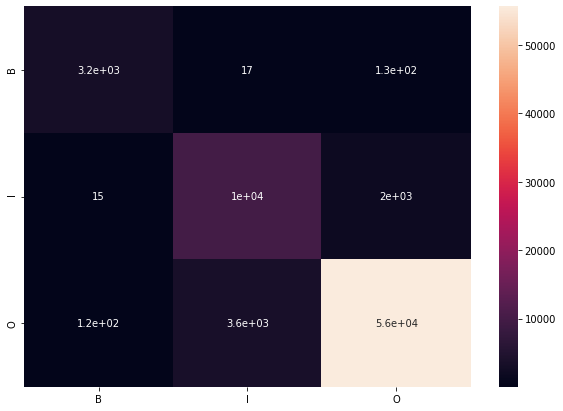

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_pred_test_ok = [x for y in y_pred_test for x in y]
y_test_ok      = [x for y in y_test for x in y]
labels         = sorted(list(set(y_test_ok)))
mtx = confusion_matrix(y_pred_test_ok, y_test_ok, labels)

df_cm = pd.DataFrame(mtx, index = labels,
                  columns = labels)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Error exploration

In [150]:
c = 0
    
for i, paper in enumerate(tqdm(papers_test)):
    pred = y_pred_test[i]
    true = y_test[i]
    
    for j,(a,b) in list(enumerate(zip(pred, true))):
        if (a == 'I' and b == 'O') or (a == 'O' and b == 'I'):
            c += 1
            entry = filtered_dataset[filtered_dataset['from']==paper].iloc[j]
            just_before = filtered_dataset[filtered_dataset['from']==paper].iloc[j-1]
            text = entry['text']
            result = entry['result']
            print(f"[{paper}] {a} instead of {b}: {text} ({result})")
            print(f"Context: ", just_before['text'], " (", just_before['result'], ")", sep="")
            #print(X_test[i])
            print("##")
    if c > 30:
        break
    

[1607.05133] I instead of O: 1. Find C ⊆ V \ {s, t} such that |C| ≤ Ω(l) · |C ∗ | and dist(G \ C) ≥ l. (nan)
Context: it is NP-hard to perform any of the following tasks. (3.0)
##
[1607.05133] I instead of O: 2. Find C ⊆ V \ {s, t} such that |C| ≤ |C ∗ | and dist(G \ C) ≥ O( (nan)
Context: 1. Find C ⊆ V \ {s, t} such that |C| ≤ Ω(l) · |C ∗ | and dist(G \ C) ≥ l. (nan)
##
[1607.05133] I instead of O: 3. Find C ⊆ V \ {s, t} such that |C| ≤ Ω(l 2 ) · |C ∗ | and dist(G \ C) ≥ O(l (nan)
Context: l). (3.0)
##
[1607.05133] I instead of O: 1. Find C ⊆ E such that |C| ≤ Ω( (nan)
Context: it is NP-hard to perform any of the following tasks. (4.0)
##
[1607.05133] I instead of O: 2. Find C ⊆ E such that |C| ≤ |C ∗ | and dist(G \ C) ≥ l (nan)
Context: l) · |C ∗ | and dist(G \ C) ≥ l. (4.0)
##
[1607.05133] I instead of O: 3. Find C ⊆ E such that |C| ≤ Ω(l (nan)
Context: 3 . (4.0)
##
[1509.05623] I instead of O: This allows to settle the case of D 1 =< maj, x + y + z > and of the two (nan)
Context: s